In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
street_tree = pd.read_csv("2005_Street_Tree_Census.csv", low_memory=False)
street_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592372 entries, 0 to 592371
Data columns (total 54 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   OBJECTID      592372 non-null  int64  
 1   cen_year      592372 non-null  int64  
 2   tree_dbh      592372 non-null  int64  
 3   address       592372 non-null  object 
 4   tree_loc      592372 non-null  object 
 5   pit_type      592372 non-null  object 
 6   soil_lvl      592372 non-null  object 
 7   status        592372 non-null  object 
 8   spc_latin     592372 non-null  object 
 9   spc_common    592372 non-null  object 
 10  vert_other    592372 non-null  object 
 11  vert_pgrd     592372 non-null  object 
 12  vert_tgrd     592372 non-null  object 
 13  vert_wall     592372 non-null  object 
 14  horz_blck     592372 non-null  object 
 15  horz_grate    592372 non-null  object 
 16  horz_plant    592372 non-null  object 
 17  horz_other    592372 non-null  object 
 18  sidw

In [3]:
select_columns = street_tree[["cen_year", "tree_dbh", "pit_type", "status", "spc_common"]]
select_columns

,cen_year,tree_dbh,pit_type,status,spc_common
0,2005,6,Sidewalk Pit,Good,"PEAR, CALLERY"
1,2005,6,Sidewalk Pit,Good,LONDON PLANETREE
2,2005,13,Continuous Pit,Good,"MAPLE, NORWAY-CR KNG"
3,2005,13,Sidewalk Pit,Good,LONDON PLANETREE
4,2005,15,Sidewalk Pit,Good,LONDON PLANETREE
...,...,...,...,...,...
592367,2005,9,Lawn,Good,LONDON PLANETREE
592368,2005,7,Lawn,Good,"MAPLE, SILVER"
592369,2005,5,Lawn,Good,"MAPLE, NORWAY-CR KNG"
592370,2005,9,Lawn,Good,"MAPLE, NORWAY-CR KNG"


In [4]:
#check for null values
select_columns.isna().sum()

cen_year      0
tree_dbh      0
pit_type      0
status        0
spc_common    0
dtype: int64

In [5]:
#shows that we have empty values in selected column
select_columns["pit_type"].value_counts()

Sidewalk Pit      293630
Lawn              234482
Continuous Pit     64257
                       3
Name: pit_type, dtype: int64

In [6]:
#replace empty values with nan and drop it, replace commas in categorical column
select_columns = select_columns.copy()
select_columns.replace({r'^\s*$': np.nan,",": '' }, regex=True, inplace=True)
select_columns.dropna()

,cen_year,tree_dbh,pit_type,status,spc_common
0,2005,6,Sidewalk Pit,Good,PEAR CALLERY
1,2005,6,Sidewalk Pit,Good,LONDON PLANETREE
2,2005,13,Continuous Pit,Good,MAPLE NORWAY-CR KNG
3,2005,13,Sidewalk Pit,Good,LONDON PLANETREE
4,2005,15,Sidewalk Pit,Good,LONDON PLANETREE
...,...,...,...,...,...
592367,2005,9,Lawn,Good,LONDON PLANETREE
592368,2005,7,Lawn,Good,MAPLE SILVER
592369,2005,5,Lawn,Good,MAPLE NORWAY-CR KNG
592370,2005,9,Lawn,Good,MAPLE NORWAY-CR KNG


In [7]:
#check for duplicates
new_columns = select_columns[select_columns.duplicated(keep=False)]
new_columns

,cen_year,tree_dbh,pit_type,status,spc_common
0,2005,6,Sidewalk Pit,Good,PEAR CALLERY
1,2005,6,Sidewalk Pit,Good,LONDON PLANETREE
2,2005,13,Continuous Pit,Good,MAPLE NORWAY-CR KNG
3,2005,13,Sidewalk Pit,Good,LONDON PLANETREE
4,2005,15,Sidewalk Pit,Good,LONDON PLANETREE
...,...,...,...,...,...
592367,2005,9,Lawn,Good,LONDON PLANETREE
592368,2005,7,Lawn,Good,MAPLE SILVER
592369,2005,5,Lawn,Good,MAPLE NORWAY-CR KNG
592370,2005,9,Lawn,Good,MAPLE NORWAY-CR KNG


In [8]:
new_columns.describe()

,cen_year,tree_dbh
count,581123.000000,581123.000000
mean,1986.345650,12.612249
std,194.270914,8.763694
min,0.000000,0.000000
25%,2005.000000,6.000000
50%,2005.000000,10.000000
75%,2006.000000,18.000000
max,2006.000000,132.000000


In [9]:
#check where minimum values are zero
check_zeros = new_columns[(new_columns["cen_year"] > 0) & (new_columns["tree_dbh"] >0)]
check_zeros

,cen_year,tree_dbh,pit_type,status,spc_common
0,2005,6,Sidewalk Pit,Good,PEAR CALLERY
1,2005,6,Sidewalk Pit,Good,LONDON PLANETREE
2,2005,13,Continuous Pit,Good,MAPLE NORWAY-CR KNG
3,2005,13,Sidewalk Pit,Good,LONDON PLANETREE
4,2005,15,Sidewalk Pit,Good,LONDON PLANETREE
...,...,...,...,...,...
592367,2005,9,Lawn,Good,LONDON PLANETREE
592368,2005,7,Lawn,Good,MAPLE SILVER
592369,2005,5,Lawn,Good,MAPLE NORWAY-CR KNG
592370,2005,9,Lawn,Good,MAPLE NORWAY-CR KNG


In [10]:
#check for outliers and remove them
Q1 = check_zeros["tree_dbh"].quantile(.25)
Q3 = check_zeros["tree_dbh"].quantile(.75)
IQR = Q3 - Q1

no_outliers = check_zeros[((check_zeros["tree_dbh"] > (Q1-1.5*IQR)) & (check_zeros["tree_dbh"]<= (Q3+1.5*IQR)))]
no_outliers 

,cen_year,tree_dbh,pit_type,status,spc_common
0,2005,6,Sidewalk Pit,Good,PEAR CALLERY
1,2005,6,Sidewalk Pit,Good,LONDON PLANETREE
2,2005,13,Continuous Pit,Good,MAPLE NORWAY-CR KNG
3,2005,13,Sidewalk Pit,Good,LONDON PLANETREE
4,2005,15,Sidewalk Pit,Good,LONDON PLANETREE
...,...,...,...,...,...
592367,2005,9,Lawn,Good,LONDON PLANETREE
592368,2005,7,Lawn,Good,MAPLE SILVER
592369,2005,5,Lawn,Good,MAPLE NORWAY-CR KNG
592370,2005,9,Lawn,Good,MAPLE NORWAY-CR KNG


In [11]:
no_outliers.describe()

,cen_year,tree_dbh
count,566959.000000,566959.000000
mean,2005.347164,12.250112
std,0.476069,7.998102
min,2005.000000,1.000000
25%,2005.000000,6.000000
50%,2005.000000,10.000000
75%,2006.000000,17.000000
max,2006.000000,36.000000


In [12]:
#select year 2005
no_outliers.sort_values(by="cen_year", ascending=False)
year = no_outliers[no_outliers["cen_year"] == 2005]
year

,cen_year,tree_dbh,pit_type,status,spc_common
0,2005,6,Sidewalk Pit,Good,PEAR CALLERY
1,2005,6,Sidewalk Pit,Good,LONDON PLANETREE
2,2005,13,Continuous Pit,Good,MAPLE NORWAY-CR KNG
3,2005,13,Sidewalk Pit,Good,LONDON PLANETREE
4,2005,15,Sidewalk Pit,Good,LONDON PLANETREE
...,...,...,...,...,...
592367,2005,9,Lawn,Good,LONDON PLANETREE
592368,2005,7,Lawn,Good,MAPLE SILVER
592369,2005,5,Lawn,Good,MAPLE NORWAY-CR KNG
592370,2005,9,Lawn,Good,MAPLE NORWAY-CR KNG


<AxesSubplot:title={'center':'Top 10 popular trees in Ny (2005)'}, ylabel='tree count'>

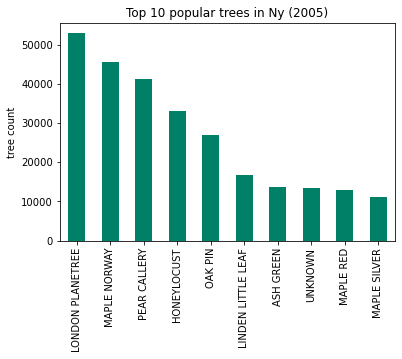

In [13]:
#what was the most common type of tree in NY in 2005(top 10)
year["spc_common"].value_counts().head(10).plot(
                                                kind="bar", ylabel="tree count",
                                                title="Top 10 popular trees in Ny (2005)", colormap="summer"
                                               )


In [14]:
#average tree diameter of top 10 trees in NY
table = year.groupby('spc_common').agg(
                                       count=("spc_common", "count"),
                                       avg_diameter=("tree_dbh", "mean")
                                      )
sort_table = table.sort_values(("count"), ascending=False).head(10)
sort_table


,count,avg_diameter
spc_common,,
LONDON PLANETREE,52960,20.569316
MAPLE NORWAY,45710,14.298359
PEAR CALLERY,41234,6.977470
HONEYLOCUST,33257,8.572752
OAK PIN,26923,16.434796
LINDEN LITTLE LEAF,16697,9.518177
ASH GREEN,13753,10.438232
UNKNOWN,13365,8.906771
MAPLE RED,12914,11.094781


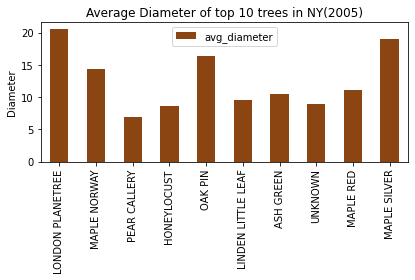

In [15]:
#plot average tree diameter of top 10
sort_table.plot.bar(y="avg_diameter", color="saddlebrown")
plt.xlabel('')
plt.ylabel("Diameter")
plt.title("Average Diameter of top 10 trees in NY(2005)")
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Health status of top 10 trees in NY(2005)'}, ylabel='tree count'>

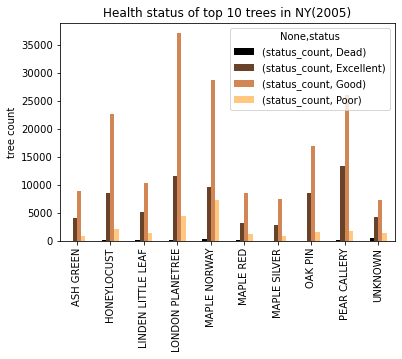

In [16]:
#health state of top 10 trees in NY
tree_list = ['LONDON PLANETREE',"MAPLE NORWAY", "PEAR CALLERY", "HONEYLOCUST", "OAK PIN", "LINDEN LITTLE LEAF",
          "ASH GREEN", "UNKNOWN","MAPLE RED","MAPLE SILVER"]
table = year[year["spc_common"].isin(tree_list)].groupby(['spc_common', "status"]).agg(status_count=("status", "count"))
table.unstack().plot.bar(xlabel="", ylabel="tree count", title="Health status of top 10 trees in NY(2005)", colormap="copper")

<AxesSubplot:title={'center':'Overall state of trees in NY(2005)'}>

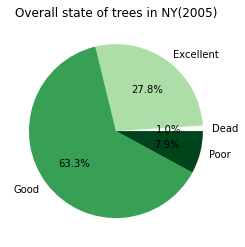

In [17]:
#health state of trees overall
year.groupby("status")["spc_common"].count().plot(
                                                  kind="pie",
                                                  ylabel="", 
                                                  autopct="%1.1f%%", 
                                                  title="Overall state of trees in NY(2005)", 
                                                  colormap="Greens"
                                                 )

<AxesSubplot:title={'center':'Health status of London Planetree'}>

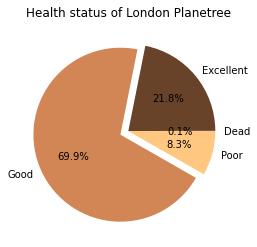

In [18]:
#percentage of london plantree that were in good shape, excellent,etc 
most_popular_tree = year[year["spc_common"] == "LONDON PLANETREE"]
most_popular_tree.groupby("status")["spc_common"].count().plot.pie(
                                                                   ylabel="", 
                                                                   autopct="%1.1f%%", 
                                                                   title="Health status of London Planetree", 
                                                                   colormap="copper", explode=(0, 0, 0.1, 0)
                                                                   )

<AxesSubplot:title={'center':'Location of trees in NY(2005)'}>

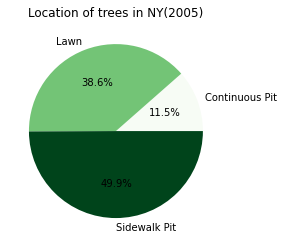

In [19]:
#overall, how many trees were located on sidewalks, continous pit, lawn
year.groupby("pit_type")["spc_common"].count().plot.pie(
                                                        ylabel="", 
                                                        autopct="%1.1f%%", 
                                                        title="Location of trees in NY(2005)", 
                                                        colormap="Greens"
                                                        )

In [20]:
#save cleaned data
year.to_csv("StreetTreeCleaned.csv", index=False)